In [1]:
# Importing dependecies
import pandas as pd
import json
import requests
import prettytable
from config import api_key
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Dictionary of series ID 
category_dict = {
    'CXUFOODAWAYLB1101M': 'Food Away',
    'CXUAPPARELLB1101M': 'Apparel',
    'CXUENTRTAINLB1101M': 'Entertainment',
    'CXUCASHCONTLB1101M': 'Cash Contribution',
    'CXUALCBEVGLB1101M': 'Alcohol Beverages',
    'CXUEDUCATNLB1101M': 'Education',
    'CXUPERSCARELB1101M': 'Personal Care',
    'CXUTOBACCOLB1101M': 'Tobacco'
}

# List of series IDs
category_list = list(category_dict.keys())

In [3]:
# Load the json response for the API queries
def json_df(dictionary):
    headers = {'Content-type': 'application/json'}
    data = json.dumps({"seriesid": list(dictionary.keys()),"startyear":"2005", "endyear":"2018","registrationkey":api_key})
    p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
    json_data = json.loads(p.text)
    try:
        df = pd.DataFrame()
        # Loops through the json response to create a DataFrame
        for series in json_data['Results']['series']:
            # Create an initial DataFrame with column of Series IDs and dictionary of data
            df_initial = pd.DataFrame(series)
            series_col = df_initial['seriesID'][0]
            # Loops through the length of the initial DF to split up its second column
            for i in range(0, len(df_initial) - 1):
                df_row = pd.DataFrame(df_initial['data'][i])
                df_row['seriesID'] = series_col
                if 'code' not in str(df_row['footnotes']): 
                    df_row['footnotes'] = ''
                else:
                    df_row['footnotes'] = str(df_row['footnotes']).split("'code': '",1)[1][:1]
                df = df.append(df_row, ignore_index=True)
    except:
        json_data['status'] == 'REQUEST_NOT_PROCESSED'
        print('BLS API has given the following Response:', json_data['status'])
        print('Reason:', json_data['message'])
    return df

In [4]:
def get_total(df):
    # Initialize variables
    total = []
    dict_list = []
    i = 0
    # Convert the value column to float - a numeric data type will be needed to visualize the data
    df['value'] = df['value'].astype(float)
    series_set = set(df["seriesID"])
    for e in series_set:
        dict_list.append(e)
    dict_list = sorted(dict_list)
    # Loop through series list to create a list of the totals of each spending category
    for key in dict_list:
        # Append a value to a list to record the spending for each category
        total.append(int(df.groupby('seriesID')['value'].sum()[key]))
        # Counter
        i = i + 1
    return total

In [ ]:
list(category_dict.values())

In [ ]:
# Labels of the categories
labels = list(category_dict.values())

# Explode the two smallest expenses (i.e Tobacco and Personal Care)
explode = (0, 0, 0, 0, 0, 0, .15, .3)  

# Initialize figure and axis
fig1, ax1 = plt.subplots()

# Create pie chart of the breakdown of discretionary spending
ax1.pie(total, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Discretionary Spending from 2005 to 2018')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

In [ ]:
apparel_dict = {'CXUBOYSLB1101M': 'Boys Apparel',
    'CXUINFANTLB1101M': 'Infant Apparel',
    'CXUGIRLSLB1101M': 'Girls Apparel',
    'CXUMENSLB1101M': 'Mens Apparel',
    'CXUWOMENSLB1101M': 'Women Apparel',
    'CXUFOOTWEARLB1101M': 'Footwear',
}

apparel_list = list(apparel_dict.keys())

In [ ]:
# Load the json response for the API queries
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": list(apparel_dict.keys()),"startyear":"2005", "endyear":"2018","registrationkey":api_key})
p1 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p1.text)

In [ ]:
# Tries to create a DataFrame based on the json response
try:
    df = pd.DataFrame()
    
    # Loops through the json response to create a DataFrame
    for series in json_data['Results']['series']:
        # Create an initial DataFrame with column of Series IDs and dictionary of data
        df_initial = pd.DataFrame(series)
        series_col = df_initial['seriesID'][0]
        
        # Loops through the length of the initial DF to split up its second column
        for i in range(0, len(df_initial) - 1):
            df_row = pd.DataFrame(df_initial['data'][i])
            df_row['seriesID'] = series_col
            if 'code' not in str(df_row['footnotes']): 
                df_row['footnotes'] = ''
            else:
                df_row['footnotes'] = str(df_row['footnotes']).split("'code': '",1)[1][:1]
            df = df.append(df_row, ignore_index=True)

except:
    json_data['status'] == 'REQUEST_NOT_PROCESSED'
    print('BLS API has given the following Response:', json_data['status'])
    print('Reason:', json_data['message'])

In [ ]:
# Convert the value column to float - a numeric data type will be needed to visualize the data
df['value'] = df['value'].astype(float)

# Sort the DF by year and reset the index
df = df.sort_values('year', ascending = True).reset_index(drop=True)
df

In [ ]:
# Initialize variables
total= []
i = 0

# Loop through series list to create a list of the totals of each spending category
for category in apparel_list:
    # Append a value to a list to record the spending for each category
    total.append(int(df.groupby('seriesID')['value'].sum()[category]))
    print(f"All consumers units spent {total[i]} on {apparel_dict[category]}")
    
    # Counter
    i = i + 1

In [ ]:
# Labels of the categories
labels = list(apparel_dict.values())

# Explode the two smallest expenses (i.e Tobacco and Personal Care)
explode = (0, 0, 0, 0, 0, 0)  

# Initialize figure and axis
fig1, ax1 = plt.subplots()

# Create pie chart of the breakdown of discretionary spending
ax1.pie(total, explode=explode, labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Apparel Spending from 2005 to 2018')


plt.show()

In [ ]:
# df = df.sort_values(['seriesID','year'], ascending = True).reset_index(drop=True)
# df

In [ ]:
# df["value"].pct_change()

In [ ]:
# apparel = bls.get_series('CXUAPPARELLB1101M', 2005, 2014)
# entertainment = bls.get_series('CXUENTRTAINLB1101M', 2005, 2014)
# food_away = bls.get_series('CXUFOODAWAYLB1101M', 2005, 2014)


# apparel.plot(kind='line', x='date',y='value', color='red')
# entertainment.plot(kind='line', x='date',y='value', color='orange')
# food_away.plot(kind='line', x='date',y='value', color='green')

# plt.title('Consumer Spend from 2005 to 2014')
# plt.xlabel('Year')
# plt.ylabel('Amount')
# plt.show()

In [26]:
# Dictionary of Northeast discretionary spending
ne_dict = {
    'CXUFOODAWAYLB1102M': 'Northeast Food Away',
    'CXUAPPARELLB1102M': 'Northeast Apparel',
    'CXUENTRTAINLB1102M': 'Northeast Entertainment',
    'CXUCASHCONTLB1102M': 'Northeast Cash Contribution',
    'CXUALCBEVGLB1102M': 'Northeast Alcohol Beverages',
    'CXUEDUCATNLB1102M': 'Northeast Education',
    'CXUPERSCARELB1102M': 'Northeast Personal Care',
    'CXUTOBACCOLB1102M': 'Northeast Tobacco'
}

ne_df = json_df(ne_dict)
ne_total = get_total(ne_df)

AttributeError: 'list' object has no attribute 'transpose'

In [9]:
# Dictionary of Midwest discretionary spending
mw_dict = {
    'CXUFOODAWAYLB1103M': 'Midwest Food Away',
    'CXUAPPARELLB1103M': 'Midwest Apparel',
    'CXUENTRTAINLB1103M': 'Midwest Entertainment',
    'CXUCASHCONTLB1103M': 'Midwest Cash Contribution',
    'CXUALCBEVGLB1103M': 'Midwest Alcohol Beverages',
    'CXUEDUCATNLB1103M': 'Midwest Education',
    'CXUPERSCARELB1103M': 'Midwest Personal Care',
    'CXUTOBACCOLB1103M': 'Midwest Tobacco'
}

mw_df = json_df(mw_dict)
mw_total = get_total(mw_df)
mw_total

[6206, 21623, 23204, 15107, 35918, 34573, 7954, 4930]

In [10]:
# Dictionary of Southern discretionary spending
south_dict = {
    'CXUFOODAWAYLB1104M': 'Southern Food Away',
    'CXUAPPARELLB1104M': 'Southern Apparel',
    'CXUENTRTAINLB1104M': 'Southern Entertainment',
    'CXUCASHCONTLB1104M': 'Southern Cash Contribution',
    'CXUALCBEVGLB1104M': 'Southern Alcohol Beverages',
    'CXUEDUCATNLB1104M': 'Southern Education',
    'CXUPERSCARELB1104M': 'Southern Personal Care',
    'CXUTOBACCOLB1104M': 'Southern Tobacco'
}

south_df = json_df(south_dict)
south_total = get_total(south_df)
south_total

[5078, 21521, 22420, 11229, 32133, 34610, 7923, 4644]

In [11]:

# Dictionary of Western discretionary spending
west_dict = {
    'CXUFOODAWAYLB1105M': 'Western Food Away',
    'CXUAPPARELLB1105M': 'Western Apparel',
    'CXUENTRTAINLB1105M': 'Western Entertainment',
    'CXUCASHCONTLB1105M': 'Western Cash Contribution',
    'CXUALCBEVGLB1105M': 'Western Alcohol Beverages',
    'CXUEDUCATNLB1105M': 'Western Education',
    'CXUPERSCARELB1105M': 'Western Personal Care',
    'CXUTOBACCOLB1105M': 'Western Tobacco'
}


west_df = json_df(west_dict)
west_total = get_total(west_df)
west_total

[7505, 25854, 27785, 15515, 41036, 41741, 9546, 3336]

In [28]:
geo_df = pd.DataFrame({"Food Away":Food_Away, "Apparel": Apparel, "Entertainment" : Entertainment, 
                       "Cash Contributions" : Cash_Contributions, "Alcohol Beverages": Alcohol_Beverages, "Education": Education, 
                       "Personal Care" : Personal_Care, "Tobacco" : Tobacco})
geo_df

,Food Away,Apparel,Entertainment,Cash Contributions,Alcohol Beverages,Education,Personal Care,Tobacco
0,38362,25281,36073,21921,6884,22978,8530,4588
1,34573,21623,35918,23204,6206,15107,7954,4930
2,34610,21521,32133,22420,5078,11229,7923,4644
3,41741,25854,41036,27785,7505,15515,9546,3336


In [30]:
# stacked bar chart example
# 4 bars for the four geographic regions

N = 4

totals_list = [ne_total, mw_total, south_total, west_total]

Food_Away   = []
Apparel   = [] 
Entertainment   = []   
Cash_Contributions   = []
Alcohol_Beverages = [] 
Education = []
Personal_Care = []
Tobacco = []

for total in totals_list:

    Alcohol_Beverages.append(total[0])
    Apparel.append(total[1])
    Cash_Contributions.append(total[2])
    Education.append(total[3])
    Entertainment.append(total[4])
    Food_Away.append(total[5])
    Personal_Care.append(total[6])
    Tobacco.append(total[7])
    
    
# ind = np.arange(N)    # the x locations for the groups
# width = 0.5           # the width of the bars: can also be len(x) sequence

# g1 = plt.bar(Alcohol_Beverages)
# plt.show()

# plt.xticks(ind+width/2, ('Found Guilty: Felony', 'Pled Guilty: Mis', 'Pled Guilty: Felony' ) )
# plt.yticks(np.arange(10,200,10))
# plt.legend ((g1[0], g2[1], g3[2], g4[3]), ('Incarceration', 'Probation','Work','Program' ))

# plt.show()

In [31]:
geo_df = pd.DataFrame({"Food Away":Food_Away, "Apparel": Apparel, "Entertainment" : Entertainment, 
                       "Cash Contributions" : Cash_Contributions, "Alcohol Beverages": Alcohol_Beverages, "Education": Education, 
                       "Personal Care" : Personal_Care, "Tobacco" : Tobacco})
geo_df

,Food Away,Apparel,Entertainment,Cash Contributions,Alcohol Beverages,Education,Personal Care,Tobacco
0,38362,25281,36073,21921,6884,22978,8530,4588
1,34573,21623,35918,23204,6206,15107,7954,4930
2,34610,21521,32133,22420,5078,11229,7923,4644
3,41741,25854,41036,27785,7505,15515,9546,3336


TypeError: only size-1 arrays can be converted to Python scalars

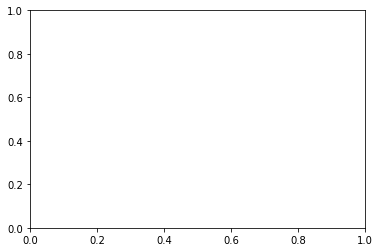

In [46]:
# index   C1              C2              C3
# 1   48692.4331  34525.0003  14020.1233
# 2   43206.1635  27978.9984  16572.0428
# 3   67398.4482  49903.4956  29856.5693


g1 = [geo_df["Food Away"] for index in geo_df.index]
g2 = [geo_df["Apparel"] for index in geo_df.index]
g3 = [geo_df["Entertainment"] for index in geo_df.index]
g4 = [geo_df["Cash Contributions"] for index in geo_df.index]
g5 = [geo_df["Alcohol Beverages"] for index in geo_df.index]
g6 = [geo_df["Education"] for index in geo_df.index]
g7 = [geo_df["Personal Care"] for index in geo_df.index]
g8 = [geo_df["Tobacco"] for index in geo_df.index]

g1

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, g1, width)
p2 = plt.bar(ind, g2, width, bottom=g1)
p3 = plt.bar(ind, g3, width, bottom=g2)
p4 = plt.bar(ind, g3, width, bottom=g2)

#plt.xticks(ind, ('NE', 'MW', 'South','West'))

#geo_df(lambda x: 'no_'+str(x), axis='index').plot.bar(stacked=True)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

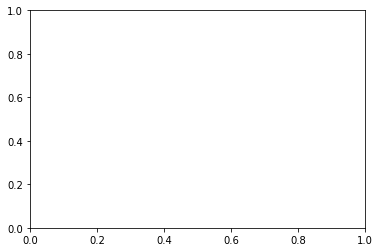

In [39]:
countries = ['<25', '25-34', '34-44', '45-54', '55-64', '65+']
bronzes = np.array([38, 17, 26, 19, 15])
silvers = np.array([37, 23, 18, 18, 10])
golds = np.array([46, 27, 26, 19, 17])
ind = [x for x, _ in enumerate(countries)]


plt.bar(ind, golds, width=0.8, label='golds', color='gold', bottom=silvers+bronzes)
plt.bar(ind, silvers, width=0.8, label='silvers', color='silver', bottom=bronzes)
plt.bar(ind, bronzes, width=0.8, label='bronzes', color='#CD853F')
plt.xticks(ind, countries)
plt.ylabel("Medals")
plt.xlabel("Countries")
plt.legend(loc="upper right")
plt.title("2012 Olympics Top Scorers")
plt.show()